<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-서비스-기획" data-toc-modified-id="1.-서비스-기획-1">1. 서비스 기획</a></span></li><li><span><a href="#2.-OCR-테스트" data-toc-modified-id="2.-OCR-테스트-2">2. OCR 테스트</a></span><ul class="toc-item"><li><span><a href="#2.1.-Google-OCR-API" data-toc-modified-id="2.1.-Google-OCR-API-2.1">2.1. Google OCR API</a></span></li><li><span><a href="#2.2.-keras-ocr" data-toc-modified-id="2.2.-keras-ocr-2.2">2.2. keras-ocr</a></span></li><li><span><a href="#2.3.-Tesseract" data-toc-modified-id="2.3.-Tesseract-2.3">2.3. Tesseract</a></span></li></ul></li><li><span><a href="#3.-테스트-결과-분석" data-toc-modified-id="3.-테스트-결과-분석-3">3. 테스트 결과 분석</a></span><ul class="toc-item"><li><span><a href="#3.1.-텍스트-위주의-심플한-표지" data-toc-modified-id="3.1.-텍스트-위주의-심플한-표지-3.1">3.1. 텍스트 위주의 심플한 표지</a></span></li><li><span><a href="#3.2.-이미지와-겹쳐진-텍스트" data-toc-modified-id="3.2.-이미지와-겹쳐진-텍스트-3.2">3.2. 이미지와 겹쳐진 텍스트</a></span></li><li><span><a href="#3.3.-타이포그래피" data-toc-modified-id="3.3.-타이포그래피-3.3">3.3. 타이포그래피</a></span></li><li><span><a href="#3.4.-회전된-텍스트" data-toc-modified-id="3.4.-회전된-텍스트-3.4">3.4. 회전된 텍스트</a></span></li></ul></li><li><span><a href="#4.-결론" data-toc-modified-id="4.-결론-4">4. 결론</a></span></li></ul></div>

# 1. 서비스 기획
- 서비스명: 책 표지 OCR
- 서비스 개요
    - 책 표지 이미지에서 도서명, 저자명 등의 텍스트를 인식하여 도서 리스트에 등록하는 서비스
    - 보유 도서, 읽은 책, 읽고 싶은 책 등의 목록을 만들어 도서를 등록하고 관리할 수 있음
- 모델 평가기준
    - 텍스트 위주의 심플한 표지를 잘 인식하는가
    - 이미지와 겹치거나 이미지에 가려진 텍스트를 인식할 수 있는가
    - 타이포그래피를 인식할 수 있는가
    - 회전된 텍스트를 인식할 수 있는가

# 2. OCR 테스트
## 2.1. Google OCR API

In [1]:
import os
 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/books'
file_list = os.listdir(img_dir)
file_list

['book2.jpg', 'book1.jpg', 'book4.jpg', 'book5.jpg', 'book3.jpg', 'book6.jpg']

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# !ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))
    print()

[book2.jpg]
Texts:

"# 1 NEW YORK TIMES BESTSELLER
“Astounding. Thrilling. Amazing." – GILLIAN FLYNN
66
the
LARGE
PRINT
EDITION
Woman
ii the
window
WE
a novel
A. J. Finn
HARPER (LUXE
"

"#"

"1"

"NEW"

"YORK"

"TIMES"

"BESTSELLER"

"“Astounding."

"Thrilling."

"Amazing.""

"–"

"GILLIAN"

"FLYNN"

"66"

"the"

"LARGE"

"PRINT"

"EDITION"

"Woman"

"ii"

"the"

"window"

"WE"

"a"

"novel"

"A."

"J."

"Finn"

"HARPER"

"(LUXE"
bounds: (1404,2252),(1519,2251),(1519,2312),(1404,2313)

[book1.jpg]
Texts:

"THE
НОВBIT
NOW A MAJOR MOTION PICTURE
J·R·R. TOLKIEN
75TH ANNIVERSARY EDITION
"

"THE"

"НОВBIT"

"NOW"

"A"

"MAJOR"

"MOTION"

"PICTURE"

"J·R·R."

"TOLKIEN"

"75TH"

"ANNIVERSARY"

"EDITION"
bounds: (1100,2314),(1483,2317),(1483,2377),(1100,2374)

[book4.jpg]
Texts:

"Harry Potter
TM
AND THE
SORCERERS STONE
J.K. RO W IING
"

"Harry"

"Potter"

"TM"

"AND"

"THE"

"SORCERERS"

"STONE"

"J.K."

"RO"

"W"

"IING"
bounds: (977,1950),(1308,1950),(1308,2045),(977,2045)

[book5.jpg]
Text

## 2.2. keras-ocr

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/ssac21/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ssac21/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


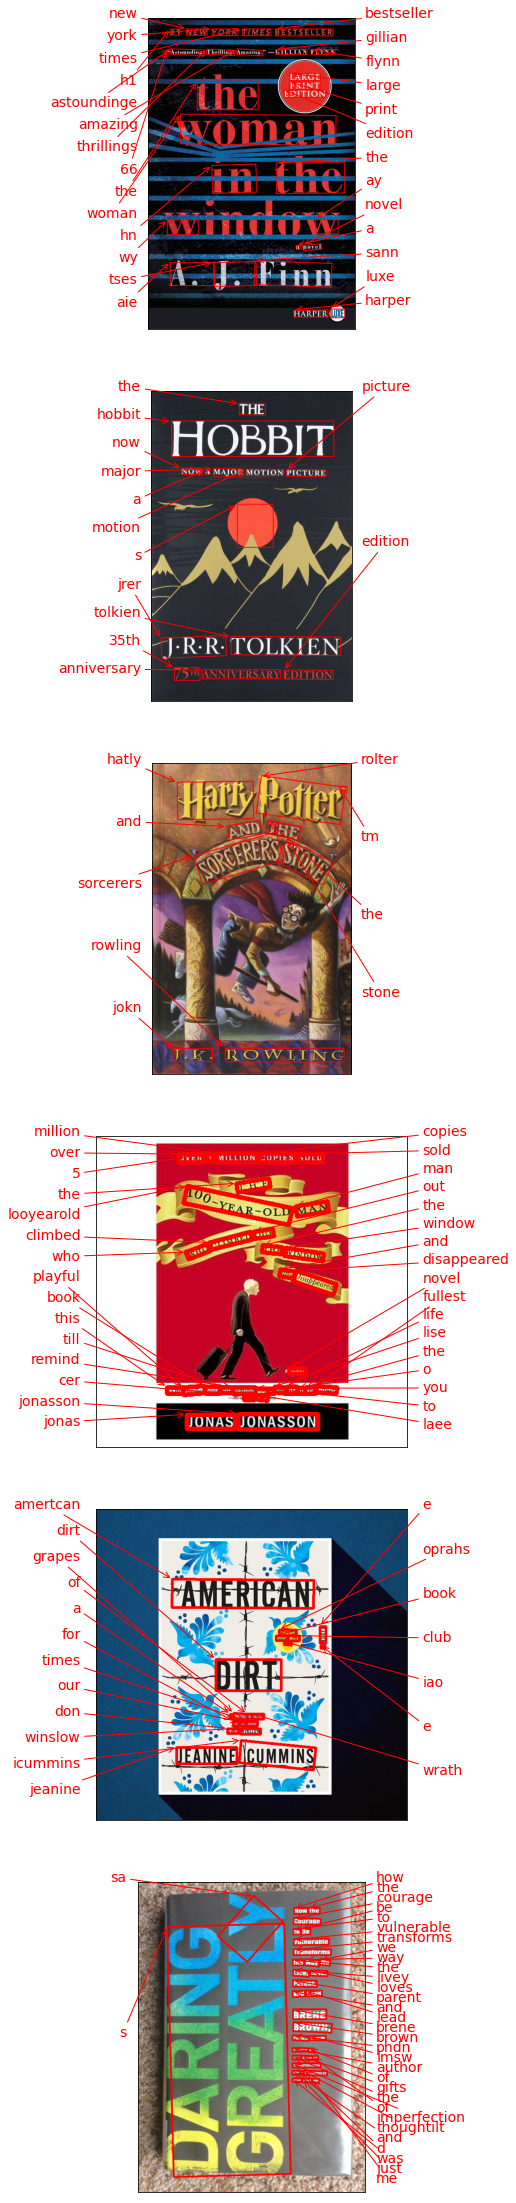

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2.3. Tesseract

In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [8]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[book2.jpg]

Done
[book1.jpg]
Sey tae

N OW

A

MAJOR

MOTION

PICTURE

-

~

{p_———


—}-R-R:

TOLKITEN~


ANNIVERSARY

mol eerOIN

Done
[book4.jpg]

Done
[book5.jpg]
L009

tH oe

—_

“YEAR-OLD

VAN

,

MBEM

OU s

, ae ae ti‘<‘é‘i—éCO CF

,

Q_

wr

_

a NDOW

Nef )

},

bear.)


thie

playiu

i howd

e sere

reminect

yt.


aes

hile

ic thy

» tolliest

JONAS

JONASS

Done
[book3.jpg]

Done
[book6.jpg]
i ; Si i);

By

“4

ey

Se

‘ieee


.

/

. |

. |

L bo




; eS.

| BS

Be

_

ea its

How the

Os

qt

eit

Sa

ae

{5

Vuln

erable

Transforms

the Way We

aT

Love,

Parent,

a

d Lead

MiP

i

a eh

Autho

r of

The

Gifts

edd

hia)

perfection

ang

|

Though

ami

Was Just Me

-

_

Ber.

the

,

-

fT

>

a

sla

fo;

a

G4 Pass

"PR


EF

em ye

m

.

-

Ay

~~ |

See

4)

ita te

Ss

ey

|

Done


# 3. 테스트 결과 분석

In [13]:
def compare_ocr(file):
    print('[keras-ocr]')
    idx = file_list.index(file)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('\n[Google OCR]')
    detect_text(os.path.join(img_dir, file))
    print('\n[Tesseract]')
    recognize_images(os.path.join(img_dir, file), save_dir)

## 3.1. 텍스트 위주의 심플한 표지
- 세 가지 방법 모두 텍스트를 대체적으로 잘 인식했다.
- Google OCR은 제목과 저자를 정확하게 인식했고, keras-ocr과 Tesseract는 저자명 "J·R·R·TOLKIEN"을 정확하게 인식하지 못했다.

[keras-ocr]


/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


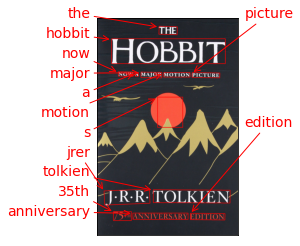


[Google OCR]
Texts:

"THE
НОВBIT
NOW A MAJOR MOTION PICTURE
J·R·R. TOLKIEN
75TH ANNIVERSARY EDITION
"

"THE"

"НОВBIT"

"NOW"

"A"

"MAJOR"

"MOTION"

"PICTURE"

"J·R·R."

"TOLKIEN"

"75TH"

"ANNIVERSARY"

"EDITION"
bounds: (1100,2314),(1483,2317),(1483,2377),(1100,2374)

[Tesseract]
Sey tae

N OW

A

MAJOR

MOTION

PICTURE

-

~

{p_———


—}-R-R:

TOLKITEN~


ANNIVERSARY

mol eerOIN

Done


In [14]:
compare_ocr('book1.jpg')

## 3.2. 이미지와 겹쳐진 텍스트
- Google OCR은 거의 정확하게 인식했고, keras-ocr은 일부 단어를 부정확하게 인식했다.
- Tesseract는 아래 두 이미지 모두 텍스트를 인식하지 못했다.

[keras-ocr]


/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


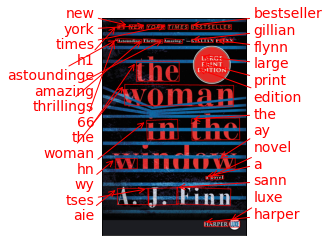


[Google OCR]
Texts:

"# 1 NEW YORK TIMES BESTSELLER
“Astounding. Thrilling. Amazing." – GILLIAN FLYNN
66
the
LARGE
PRINT
EDITION
Woman
ii the
window
WE
a novel
A. J. Finn
HARPER (LUXE
"

"#"

"1"

"NEW"

"YORK"

"TIMES"

"BESTSELLER"

"“Astounding."

"Thrilling."

"Amazing.""

"–"

"GILLIAN"

"FLYNN"

"66"

"the"

"LARGE"

"PRINT"

"EDITION"

"Woman"

"ii"

"the"

"window"

"WE"

"a"

"novel"

"A."

"J."

"Finn"

"HARPER"

"(LUXE"
bounds: (1404,2252),(1519,2251),(1519,2312),(1404,2313)

[Tesseract]

Done


In [15]:
compare_ocr('book2.jpg')

[keras-ocr]


/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


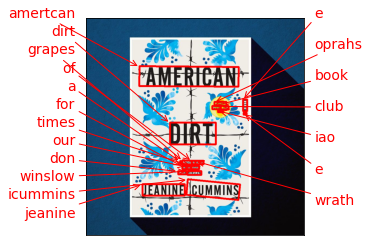


[Google OCR]
Texts:

""AMERICAN
Oprah's
Book Club
2020
DIRT
"A Grapes of Wrath
for our times."
-DON WINSLOW
JEANINE CUMMINS
A NOVEL
"

""AMERICAN"

"Oprah's"

"Book"

"Club"

"2020"

"DIRT"

""A"

"Grapes"

"of"

"Wrath"

"for"

"our"

"times.""

"-DON"

"WINSLOW"

"JEANINE"

"CUMMINS"

"A"

"NOVEL"
bounds: (576,340),(576,303),(588,303),(588,340)

[Tesseract]

Done


In [16]:
compare_ocr('book3.jpg')

## 3.3. 타이포그래피
- Google OCR은 제목과 저자 모두 정확하게 인식했다.
- keras-ocr은 타이포그래피가 적용된 제목 "Harry Potter"를 제대로 인식하지 못했다.
- Tesseract는 텍스트를 아예 인식하지 못했다.

[keras-ocr]


/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


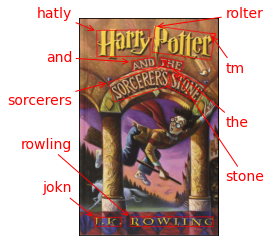


[Google OCR]
Texts:

"Harry Potter
TM
AND THE
SORCERERS STONE
J.K. RO W IING
"

"Harry"

"Potter"

"TM"

"AND"

"THE"

"SORCERERS"

"STONE"

"J.K."

"RO"

"W"

"IING"
bounds: (977,1950),(1308,1950),(1308,2045),(977,2045)

[Tesseract]

Done


In [17]:
compare_ocr('book4.jpg')

## 3.4. 회전된 텍스트
- Google OCR은 대부분 정확하게 인식했다.
- keras-ocr은 아래 첫 번째 이미지의 30도 정도 회전된 텍스트는 대부분 잘 인식했지만, 두 번째 이미지의 90도 회전된 텍스트는 인식하지 못했다.
- Tesseract는 두 가지 경우 모두 제대로 인식하지 못했다.

[keras-ocr]


/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


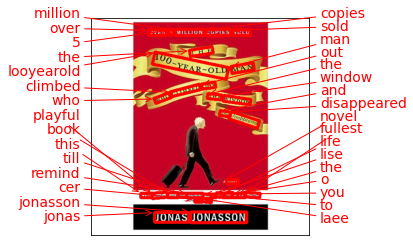


[Google OCR]
Texts:

"OVER 5 MILLION COPIES SOLD
THE
100-YEAR-OLD MAN
THE WINDOW
WHO CLIMBED OUT
and Disappeared
A NOVEL
"This playful book will remind you to live life to the fullest."
-Marie Cleire Maganine
JONAS JONASSON
"

"OVER"

"5"

"MILLION"

"COPIES"

"SOLD"

"THE"

"100-YEAR-OLD"

"MAN"

"THE"

"WINDOW"

"WHO"

"CLIMBED"

"OUT"

"and"

"Disappeared"

"A"

"NOVEL"

""This"

"playful"

"book"

"will"

"remind"

"you"

"to"

"live"

"life"

"to"

"the"

"fullest.""

"-Marie"

"Cleire"

"Maganine"

"JONAS"

"JONASSON"
bounds: (226,439),(343,439),(343,456),(226,456)

[Tesseract]
L009

tH oe

—_

“YEAR-OLD

VAN

,

MBEM

OU s

, ae ae ti‘<‘é‘i—éCO CF

,

Q_

wr

_

a NDOW

Nef )

},

bear.)


thie

playiu

i howd

e sere

reminect

yt.


aes

hile

ic thy

» tolliest

JONAS

JONASS

Done


In [18]:
compare_ocr('book5.jpg')

[keras-ocr]


/home/ssac21/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


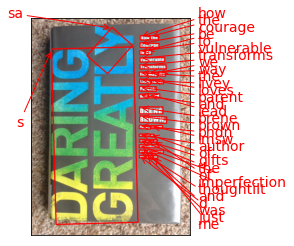


[Google OCR]
Texts:

"DARING
V.
GREATLY
"

"DARING"

"V."

"GREATLY"
bounds: (337,1081),(343,78),(599,80),(593,1083)

[Tesseract]
i ; Si i);

By

“4

ey

Se

‘ieee


.

/

. |

. |

L bo




; eS.

| BS

Be

_

ea its

How the

Os

qt

eit

Sa

ae

{5

Vuln

erable

Transforms

the Way We

aT

Love,

Parent,

a

d Lead

MiP

i

a eh

Autho

r of

The

Gifts

edd

hia)

perfection

ang

|

Though

ami

Was Just Me

-

_

Ber.

the

,

-

fT

>

a

sla

fo;

a

G4 Pass

"PR


EF

em ye

m

.

-

Ay

~~ |

See

4)

ita te

Ss

ey

|

Done


In [19]:
compare_ocr('book6.jpg')

# 4. 결론
- 다양한 북커버 이미지를 대상으로 OCR 테스트를 진행한 결과를 정리해보면 아래 표와 같다.
- 결론적으로 세 가지 모델 중 해당 서비스에 가장 적절한 모델은 Google OCR이다.

평가기준|Google OCR|keras-ocr|Tesseract
--|:--:|:--:|:--:
텍스트 위주의 심플한 표지 인식|O|O|O
이미지와 겹쳐진 텍스트 인식|O|O|X
타이포그래피 인식|O|X|X
회전된 텍스트 인식|O|X|X